In [1]:
#Micah Raquena-Pequeno
#Micah Code Begin
#%matplotlib notebook

In [2]:
# Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from pathlib import Path
import seaborn as sns

In [3]:
#Load in csv
csv_file = Path("Property Sales of Melbourne City.csv")
mel_sales_df = pd.read_csv(csv_file)
mel_sales_df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
#Remove rows with missing distance data & Erroneous Price data
#Remove outlier rooms (<6)
mel_sales_df = mel_sales_df.loc[mel_sales_df['Distance']>=0]
mel_sales_df = mel_sales_df.loc[mel_sales_df['Price']>0]
#mel_sales_df = mel_sales_df.loc[mel_sales_df['Rooms']<6]
mel_sales_df.head()

#convert data to numeric
mel_sales_df['Distance']=pd.to_numeric(mel_sales_df['Distance'])
mel_sales_df['Price']=pd.to_numeric(mel_sales_df['Price'])
mel_sales_df['Landsize']=pd.to_numeric(mel_sales_df['Landsize'])

print(mel_sales_df.columns.tolist()) #confirm names of columns
mel_sales_df.head()


['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
#-------------------------Boxplot Distributions & Outliers

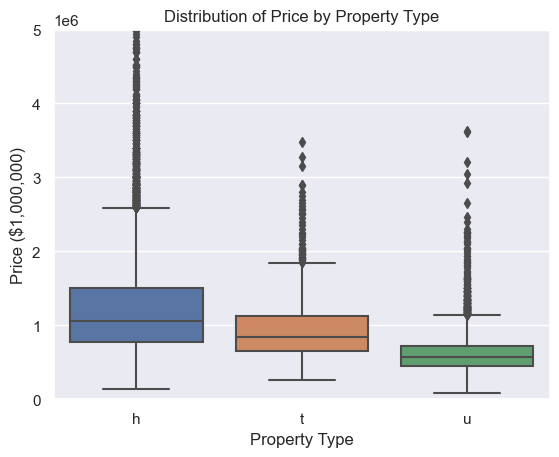

Price Qantile Data by Type
----------------------------------------------
Identifying House Price Outliers
The lower quartile of House Price is: $772000.0
The upper quartile of House Price is: $1500000.0
The interquartile range of House Price is: $728000.0
The the median of House Price is: $1060000.0
 
OUTLIERS: Values above $2592000.0 could be House Price outliers.
----------------------------------------------
Identifying Townhouse Price Outliers
The lower quartile of Townhouse Price is: $652500.0
The upper quartile of Townhouse Price is: $1130000.0
The interquartile range of Townhouse Price is: $477500.0
The the median of Townhouse Price is: 841000.0
 
OUTLIERS: Values above $1846250.0 could be Townhouse Price outliers.
----------------------------------------------
Identifying Unit Price Outliers
The lower quartile of Unit Price is: $442000.0
The upper quartile of Unit Price is: $720000.0
The interquartile range of Unit Price is: $278000.0
The the median of Unit Price is: $570000.0

In [6]:
#Key values to review include Price, Distance, Landsize by property type to determine which has most impact on prics.
#When reviewing follow - Price 

# Create boxplot by unit to viee distribution of price 
# categorise by Type - (h)ouse , (t)ownhouse , (unit)
sns.set(style="darkgrid")
boxplot= sns.boxplot(data=mel_sales_df, x='Type', y='Price').set(
    title='Distribution of Price by Property Type', ylabel = "Price ($1,000,000)", 
    xlabel = "Property Type",ylim = (-100,5000000))

plt.show()


#-------------------------------------------------
#Price Outliers


#Use Quartile by Type to identify Price outliers
#categorise by Type - (h)ouse , (t)ownhouse , (unit)
hp_Price= mel_sales_df.loc[(mel_sales_df["Type"]=="h")&(mel_sales_df["Price"]!=0),"Price"]
tp_Price =mel_sales_df.loc[(mel_sales_df["Type"]=="t")&(mel_sales_df["Price"]!=0),"Price"]
up_Price =mel_sales_df.loc[(mel_sales_df["Type"]=="u")&(mel_sales_df["Price"]!=0),"Price"]

print("Price Qantile Data by Type")
#Price Quartiles
#house
hp_quartiles = hp_Price.quantile([.25,.5,.75])
hp_lowerq = hp_quartiles[0.25]
hp_upperq = hp_quartiles[0.75]
hp_iqr = round((hp_upperq-hp_lowerq),0)
hp_lower_bound = round((hp_lowerq - (1.5*hp_iqr)),0)
hp_upper_bound = round((hp_upperq + (1.5*hp_iqr)),0)
print("----------------------------------------------")
print("Identifying House Price Outliers")
print(f"The lower quartile of House Price is: ${hp_lowerq}")
print(f"The upper quartile of House Price is: ${hp_upperq}")
print(f"The interquartile range of House Price is: ${hp_iqr}")
print(f"The the median of House Price is: ${hp_quartiles[0.5]}")
print(" ")
if hp_lower_bound > 0:
    print(f"OUTLIERS: Values below ${hp_lower_bound} could be House Price outliers.")
print(f"OUTLIERS: Values above ${hp_upper_bound} could be House Price outliers.")
print("----------------------------------------------")

#townhouse
tp_quartiles = tp_Price.quantile([.25,.5,.75])
tp_lowerq = tp_quartiles[0.25]
tp_upperq = tp_quartiles[0.75]
tp_iqr = round((tp_upperq-tp_lowerq),0)
tp_lower_bound = round((tp_lowerq - (1.5*tp_iqr)),0)
tp_upper_bound = round((tp_upperq + (1.5*tp_iqr)),0)

print("Identifying Townhouse Price Outliers")
print(f"The lower quartile of Townhouse Price is: ${tp_lowerq}")
print(f"The upper quartile of Townhouse Price is: ${tp_upperq}")
print(f"The interquartile range of Townhouse Price is: ${tp_iqr}")
print(f"The the median of Townhouse Price is: {tp_quartiles[0.5]}")
print(" ")
if tp_lower_bound > 0:
    print(f"OUTLIERS: Values below ${tp_lower_bound} could be Townhouse Price outliers.")
print(f"OUTLIERS: Values above ${tp_upper_bound} could be Townhouse Price outliers.")
print("----------------------------------------------")

#Unit
up_quartiles = up_Price.quantile([.25,.5,.75])
up_lowerq = up_quartiles[0.25]
up_upperq = up_quartiles[0.75]
up_iqr = round((up_upperq-up_lowerq),0)
up_lower_bound = round((up_lowerq - (1.5*up_iqr)),0)
up_upper_bound = round((up_upperq + (1.5*up_iqr)),0)

print("Identifying Unit Price Outliers")
print(f"The lower quartile of Unit Price is: ${up_lowerq}")
print(f"The upper quartile of Unit Price is: ${up_upperq}")
print(f"The interquartile range of Unit Price is: ${up_iqr}")
print(f"The the median of Unit Price is: ${up_quartiles[0.5]}")
print(" ")
if up_lower_bound > 0:
    print(f"OUTLIERS: Values below ${up_lower_bound} could be Unit Price outliers.")
print(f"OUTLIERS: Values above ${up_upper_bound} could be Unit Price outliers.")
print("----------------------------------------------")

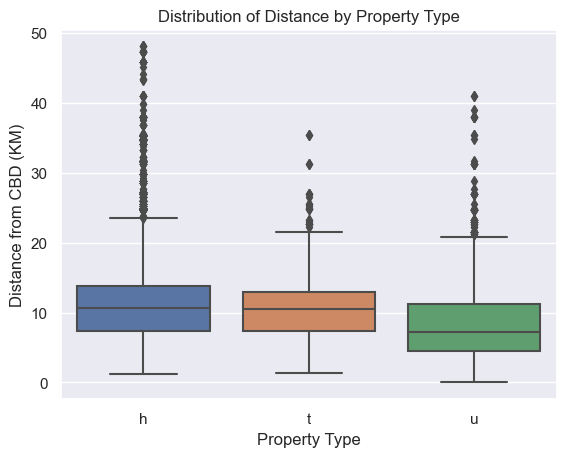

Distance Qantile Data by Type
----------------------------------------------
Identifying House Distance Outliers
The lower quartile of House Distance to CBD is: 7.3 km
The upper quartile of House Distance to CBD  is: 13.8 km
The interquartile range of House Distance to CBD  is: 6.5 km
The the median of House Distance to CBD  is: 10.6 km
 
OUTLIERS: Values above 23.55 km could be House Distance outliers.
----------------------------------------------
Identifying Townhouse Distance Outliers
The lower quartile of Townhouse Distance to CBD is: 7.3 km
The upper quartile of Townhouse Distance to CBD  is: 13.0 km
The interquartile range of Townhouse Distance to CBD  is: 5.7 km
The the median of Townhouse Distance to CBD  is: 10.5 km
 
OUTLIERS: Values above 21.55 km could be Townhouse Distance outliers.
----------------------------------------------
Identifying Unit Distance Outliers
The lower quartile of Unit Distance to CBD is: 4.5 km
The upper quartile of Unit Distance to CBD  is: 11.2 km


In [7]:
# Create boxplot by unit to distribution of price
# categorise by Type - (h)ouse , (t)ownhouse , (unit) 
sns.set(style="darkgrid")
boxplot= sns.boxplot(data=mel_sales_df, x='Type', y='Distance').set(
    title='Distribution of Distance by Property Type', ylabel = "Distance from CBD (KM)", 
    xlabel = "Property Type")
plt.show()


#------------------------------------------------------------------
# Distance Outliers


# Use Quartile by Type to identify distance outliers
hd_distance= mel_sales_df.loc[(mel_sales_df["Type"]=="h")&(mel_sales_df["Distance"]!=0),"Distance"]
td_distance =mel_sales_df.loc[(mel_sales_df["Type"]=="t")&(mel_sales_df["Distance"]!=0),"Distance"]
ud_distance =mel_sales_df.loc[(mel_sales_df["Type"]=="u")&(mel_sales_df["Distance"]!=0),"Distance"]

print("Distance Qantile Data by Type")


#Distance Quartiles
#house
hd_quartiles = hd_distance.quantile([.25,.5,.75])
hd_lowerq = hd_quartiles[0.25]
hd_upperq = hd_quartiles[0.75]
hd_iqr = round((hd_upperq-hd_lowerq),2)
hd_lower_bound = round((hd_lowerq - (1.5*hd_iqr)),2)
hd_upper_bound = round((hd_upperq + (1.5*hd_iqr)),2)
print("----------------------------------------------")
print("Identifying House Distance Outliers")
print(f"The lower quartile of House Distance to CBD is: {hd_lowerq} km")
print(f"The upper quartile of House Distance to CBD  is: {hd_upperq} km")
print(f"The interquartile range of House Distance to CBD  is: {hd_iqr} km")
print(f"The the median of House Distance to CBD  is: {hd_quartiles[0.5]} km")
print(" ")
if hd_lower_bound > 0:
    print(f"OUTLIERS: Values below {hd_lower_bound} km could be House Distance outliers.")
print(f"OUTLIERS: Values above {hd_upper_bound} km could be House Distance outliers.")
print("----------------------------------------------")

#townhouse
td_quartiles = td_distance.quantile([.25,.5,.75])
td_lowerq = td_quartiles[0.25]
td_upperq = td_quartiles[0.75]
td_iqr = round((td_upperq-td_lowerq),2)
td_lower_bound = round((td_lowerq - (1.5*td_iqr)),2)
td_upper_bound = round((td_upperq + (1.5*td_iqr)),2)

print("Identifying Townhouse Distance Outliers")
print(f"The lower quartile of Townhouse Distance to CBD is: {td_lowerq} km")
print(f"The upper quartile of Townhouse Distance to CBD  is: {td_upperq} km")
print(f"The interquartile range of Townhouse Distance to CBD  is: {td_iqr} km")
print(f"The the median of Townhouse Distance to CBD  is: {td_quartiles[0.5]} km")
print(" ")
if td_lower_bound > 0:
    print(f"OUTLIERS: Values below {td_lower_bound} km could be Townhouse Distance outliers.")
print(f"OUTLIERS: Values above {td_upper_bound} km could be Townhouse Distance outliers.")
print("----------------------------------------------")

#Unit
ud_quartiles = ud_distance.quantile([.25,.5,.75])
ud_lowerq = ud_quartiles[0.25]
ud_upperq = ud_quartiles[0.75]
ud_iqr = round((ud_upperq-ud_lowerq),2)
ud_lower_bound = round((ud_lowerq - (1.5*ud_iqr)),2)
ud_upper_bound = round((ud_upperq + (1.5*ud_iqr)),2)


print("Identifying Unit Distance Outliers")
print(f"The lower quartile of Unit Distance to CBD is: {ud_lowerq} km")
print(f"The upper quartile of Unit Distance to CBD  is: {ud_upperq} km")
print(f"The interquartile range of Unit Distance to CBD  is: {ud_iqr} km")
print(f"The the median of Unit Distance to CBD  is: {ud_quartiles[0.5]} km")
print(" ")
if ud_lower_bound > 0:
    print(f"OUTLIERS: Values below {ud_lower_bound} km could be Unit Distance outliers.")
print(f"OUTLIERS: Values above {ud_upper_bound} km could be Unit Distance outliers.")
print("----------------------------------------------")


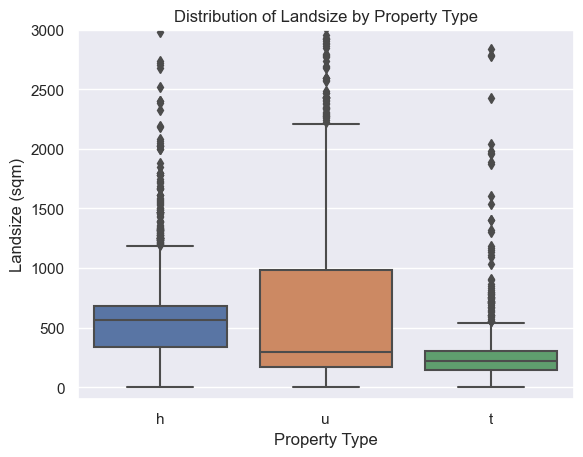

Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers
Landsize Qantile Data by Type
----------------------------------------------
Identifying House Landsize Outliers
The lower quartile of House Landsize is: 339.0 sqm
The upper quartile of House Landsize is: 679.0 sqm
The interquartile range of House Landsize is: 340.0 sqm
The the median of House Landsize is: 565.0 sqm
 
OUTLIERS: Values above 1189.0 sqm could be House Landsize outliers.
----------------------------------------------
Identifying Townhouse Landsize Outliers
The lower quartile of Townhouse Landsize is: 166.0 sqm
The upper quartile of Townhouse Landsize is: 982.75 sqm
The interquartile range of Townhouse Landsize is: 816.75 sqm
The the median of Townhouse Landsize is: 292.0 sqm
 
OUTLIERS: Values above 2207.88 sqm could be Townhouse Landsize outliers.
----------------------------------------------
Identifying Unit Landsize Outliers


In [8]:
# Create boxplot by unit to viee distribution of price 
sns.set(style="darkgrid")
mel_sales_ls_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>0)]
boxplot= sns.boxplot(data=mel_sales_ls_df, x='Type', y='Landsize').set(
    title='Distribution of Landsize by Property Type', ylabel = "Landsize (sqm)", 
    xlabel = "Property Type",ylim = (-100,3000))
plt.show()
print("Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers")
#mel_sales_ls_df.head()


#---------------------------------------------------

#Landsize

# Use quartiling by type for Landsize outliers to remove:
hl_landsize= mel_sales_df.loc[(mel_sales_df["Type"]=="h")&(mel_sales_df["Landsize"]>0),"Landsize"]
tl_landsize =mel_sales_df.loc[(mel_sales_df["Type"]=="u")&(mel_sales_df["Landsize"]>0),"Landsize"]
ul_landsize =mel_sales_df.loc[(mel_sales_df["Type"]=="u")&(mel_sales_df["Landsize"]>00),"Landsize"]


print("Landsize Qantile Data by Type")

#Landsize Quartiles
#house
hl_quartiles = hl_landsize.quantile([.25,.5,.75])
hl_lowerq = hl_quartiles[0.25]
hl_upperq = hl_quartiles[0.75]
hl_iqr = round((hl_upperq-hl_lowerq),2)
hl_lower_bound = round((hl_lowerq - (1.5*hl_iqr)),2)
hl_upper_bound = round((hl_upperq + (1.5*hl_iqr)),2)
print("----------------------------------------------")
print("Identifying House Landsize Outliers")
print(f"The lower quartile of House Landsize is: {hl_lowerq} sqm")
print(f"The upper quartile of House Landsize is: {hl_upperq} sqm")
print(f"The interquartile range of House Landsize is: {hl_iqr} sqm")
print(f"The the median of House Landsize is: {hl_quartiles[0.5]} sqm")
print(" ")
if hl_lower_bound > 0:
  print(f"OUTLIERS: Values below {hl_lower_bound} sqm could be House Landsize outliers.")
print(f"OUTLIERS: Values above {hl_upper_bound} sqm could be House Landsize outliers.")
print("----------------------------------------------")

#townhouse
tl_quartiles = tl_landsize.quantile([.25,.5,.75])
tl_lowerq = tl_quartiles[0.25]
tl_upperq = tl_quartiles[0.75]
tl_iqr = round((tl_upperq-tl_lowerq),2)
tl_lower_bound = round((tl_lowerq - (1.5*tl_iqr)),2)
tl_upper_bound = round((tl_upperq + (1.5*tl_iqr)),2)

print("Identifying Townhouse Landsize Outliers")
print(f"The lower quartile of Townhouse Landsize is: {tl_lowerq} sqm")
print(f"The upper quartile of Townhouse Landsize is: {tl_upperq} sqm")
print(f"The interquartile range of Townhouse Landsize is: {tl_iqr} sqm")
print(f"The the median of Townhouse Landsize is: {tl_quartiles[0.5]} sqm")
print(" ")
if tl_lower_bound > 0:
  print(f"OUTLIERS: Values below {tl_lower_bound} sqm could be Townhouse Landsize outliers.")
print(f"OUTLIERS: Values above {tl_upper_bound} sqm could be Townhouse Landsize outliers.")
print("----------------------------------------------")

#Unit
ul_quartiles = ul_landsize.quantile([.25,.5,.75])
ul_lowerq = ul_quartiles[0.25]
ul_upperq = ul_quartiles[0.75]
ul_iqr = round((ul_upperq-ul_lowerq),2)
ul_lower_bound = round((ul_lowerq - (1.5*ul_iqr)),2)
ul_upper_bound = round((ul_upperq + (1.5*ul_iqr)),2)

print("Identifying Unit Landsize Outliers")
print(f"The lower quartile of Unit Landsize is: {ul_lowerq} sqm")
print(f"The upper quartile of Unit Landsize is: {ul_upperq} sqm")
print(f"The interquartile range of Unit Landsize is: {ul_iqr} sqm")
print(f"The the median of Unit Landsize is: {ul_quartiles[0.5]} sqm")
print(" ")
if ul_lower_bound > 0:
  print(f"OUTLIERS: Values below {ul_lower_bound} sqm could be Unit Landsize outliers.")
print(f"OUTLIERS: Values above {ul_upper_bound} sqm could be Unit Landsize outliers.")
print("----------------------------------------------")

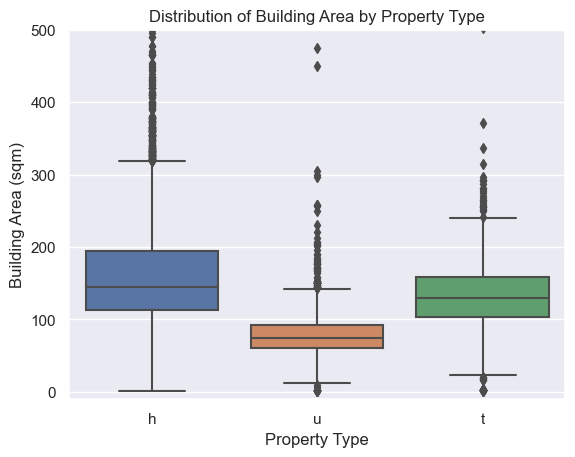

Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers
Building Area Qantile Data by Type
----------------------------------------------
Identifying House BuildingArea Outliers
The lower quartile of House Building Area is: 113.0
The upper quartile of House Building Area is: 195.0964
The interquartile range of House BuildingArea is: 82.0
The the median of House BuildingArea is: 145.0
 
OUTLIERS: Values above 318.0 could be House Building Area outliers.
----------------------------------------------
Identifying Townhouse Building Area Outliers
The lower quartile of Townhouse Building Area is: 103.0
The upper quartile of Townhouse Building Area is: 158.0
The interquartile range of Townhouse Building Area is: 55.0
The the median of Townhouse BuildingArea is: 130.0
 
OUTLIERS: Values below 20.0 could be Townhouse Building Area outliers.
OUTLIERS: Values above 240.0 could be Townhouse Building Area outl

In [9]:
# Create boxplot by unit to  Building Area distribution of price 
sns.set(style="darkgrid")
mel_sales_ba_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>0)]
boxplot= sns.boxplot(data=mel_sales_ba_df, x='Type', y='BuildingArea').set(
    title='Distribution of Building Area by Property Type', ylabel = "Building Area (sqm)", 
    xlabel = "Property Type",ylim = (-10,500))
plt.show()
print("Plot Summary: Due to the varying dirstibution in peoperty Type - each set should be analysed seperately when reviewing distribution and outliers")
mel_sales_ba_df.head()


#-------------------------------------
#Building Area


#Use Quartile by Type to identify BuildingArea outliers
#categorise by Type - (h)ouse , (t)ownhouse , (unit)
ha_barea= mel_sales_df.loc[(mel_sales_df["Type"]=="h")&(mel_sales_df["BuildingArea"]>0),"BuildingArea"]
ta_barea =mel_sales_df.loc[(mel_sales_df["Type"]=="t")&(mel_sales_df["BuildingArea"]>0),"BuildingArea"]
u_barea =mel_sales_df.loc[(mel_sales_df["Type"]=="u")&(mel_sales_df["BuildingArea"]>0),"BuildingArea"]

print("Building Area Qantile Data by Type")
#BuildingArea Quartiles
#house
ha_quartiles = ha_barea.quantile([.25,.5,.75])
ha_lowerq = ha_quartiles[0.25]
ha_upperq = ha_quartiles[0.75]
ha_iqr = round((ha_upperq-ha_lowerq),0)
ha_lower_bound = round((ha_lowerq - (1.5*ha_iqr)),0)
ha_upper_bound = round((ha_upperq + (1.5*ha_iqr)),0)
print("----------------------------------------------")
print("Identifying House BuildingArea Outliers")
print(f"The lower quartile of House Building Area is: {ha_lowerq}")
print(f"The upper quartile of House Building Area is: {ha_upperq}")
print(f"The interquartile range of House BuildingArea is: {ha_iqr}")
print(f"The the median of House BuildingArea is: {ha_quartiles[0.5]}")
print(" ")
if ha_lower_bound > 0:
    print(f"OUTLIERS: Values below {ha_lower_bound} could be House Building Area outliers.")
print(f"OUTLIERS: Values above {ha_upper_bound} could be House Building Area outliers.")
print("----------------------------------------------")

#townhouse
ta_quartiles = ta_barea.quantile([.25,.5,.75])
ta_lowerq = ta_quartiles[0.25]
ta_upperq = ta_quartiles[0.75]
ta_iqr = round((ta_upperq-ta_lowerq),0)
ta_lower_bound = round((ta_lowerq - (1.5*ta_iqr)),0)
ta_upper_bound = round((ta_upperq + (1.5*ta_iqr)),0)

print("Identifying Townhouse Building Area Outliers")
print(f"The lower quartile of Townhouse Building Area is: {ta_lowerq}")
print(f"The upper quartile of Townhouse Building Area is: {ta_upperq}")
print(f"The interquartile range of Townhouse Building Area is: {ta_iqr}")
print(f"The the median of Townhouse BuildingArea is: {ta_quartiles[0.5]}")
print(" ")
if ta_lower_bound > 0:
    print(f"OUTLIERS: Values below {ta_lower_bound} could be Townhouse Building Area outliers.")
print(f"OUTLIERS: Values above {ta_upper_bound} could be Townhouse Building Area outliers.")
print("----------------------------------------------")

#Unit
ua_quartiles = u_barea.quantile([.25,.5,.75])
ua_lowerq = ua_quartiles[0.25]
ua_upperq = ua_quartiles[0.75]
ua_iqr = round((ua_upperq-ua_lowerq),0)
ua_lower_bound = round((ua_lowerq - (1.5*ua_iqr)),0)
ua_upper_bound = round((ua_upperq + (1.5*ua_iqr)),0)

print("Identifying Unit BuildingArea Outliers")
print(f"The lower quartile of Unit BuildingArea is: {ua_lowerq}")
print(f"The upper quartile of Unit BuildingArea is: {ua_upperq}")
print(f"The interquartile range of Unit BuildingArea is: {ua_iqr}")
print(f"The the median of Unit BuildingArea is: {ua_quartiles[0.5]}")
print(" ")
if ua_lower_bound > 0:
    print(f"OUTLIERS: Values below {ua_lower_bound} could be Unit BuildingArea outliers.")
print(f"OUTLIERS: Values above {ua_upper_bound} could be Unit BuildingArea outliers.")
print("----------------------------------------------")


In [10]:
print("----------------------------------------------")
print("Upper Bounds ")

#values on upper outlier band
#Distance
print(hd_upper_bound)
print(td_upper_bound)
print(ud_upper_bound)

#Landsize
print(hl_upper_bound)
print(tl_upper_bound)
print(ul_upper_bound)

#Price
print(hp_upper_bound)
print(tp_upper_bound)
print(up_upper_bound)
print(up_lower_bound)

#building Area
print(ha_upper_bound)
print(ta_upper_bound)
print(ta_lower_bound)
print(ua_upper_bound)
print(ua_lower_bound)


----------------------------------------------
Upper Bounds 
23.55
21.55
21.25
1189.0
2207.88
2207.88
2592000.0
1846250.0
1137000.0
25000.0
318.0
240.0
20.0
142.0
10.0


In [11]:
#-------------------------Distance Scatter & Regression

The r-squared value is:0.1134
y = -34822x + 1521090


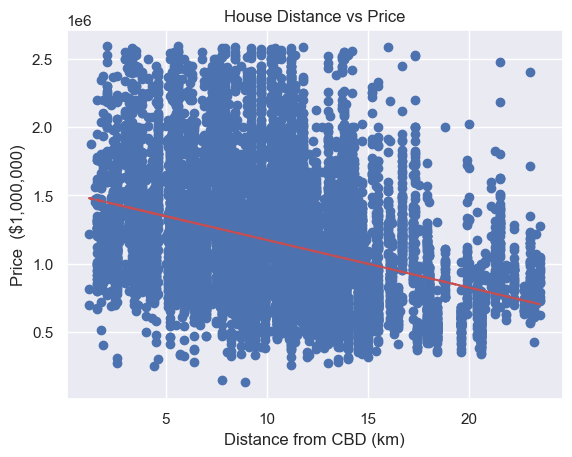

In [12]:
# (h)ouse Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
hd_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<hd_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)]

hd_distance = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h"),"Distance"] 
hd_price = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(hd_slope, hd_int, hd_rvalue, hd_pvalue, hd_stderr) = stats.linregress(hd_distance, hd_price)
hd_fit = hd_distance * hd_slope +hd_int
hd_line_eq = "y = " + str(round(hd_slope)) + "x + " + str(round(hd_int))
hd_colour = hd_mel_sales_df["Rooms"]

plt.scatter(hd_distance,hd_price, label = hd_colour)
plt.plot(hd_distance,hd_fit,"r--")

plt.title('House Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
hd_rsquare= round((hd_rvalue**2),4)

plt.annotate(hd_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hd_rsquare}")
print(f"{hd_line_eq}")
plt.show()

The r-squared value is:0.0056
y = -5865x + 950883


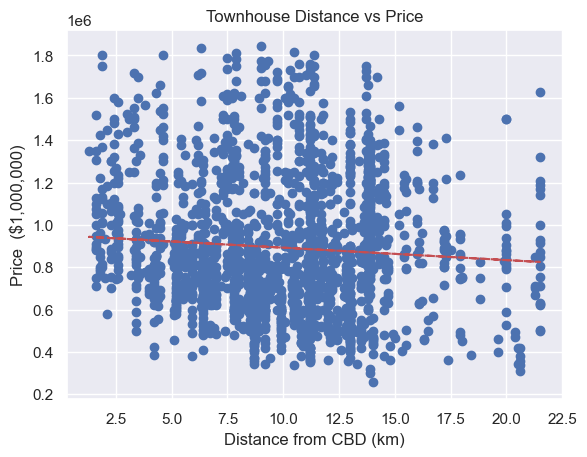

In [13]:
# (t)ownhouse Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (t)ownouse distance and (t)ownouse price 
td_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<td_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]
td_distance = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t"),"Distance"] 
td_price = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t"),"Price"]
#groups = mel_sales_df.groupby("Type") 

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(td__slope, td__int, td__rvalue, td__pvalue, td__stderr) = stats.linregress(td_distance, td_price)
td__fit = td_distance * td__slope +td__int
td_line_eq = "y = " + str(round(td__slope)) + "x + " + str(round(td__int))


plt.scatter(td_distance,td_price)
plt.plot(td_distance,td__fit,"r--")

plt.title('Townhouse Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
td__rsquare= round((td__rvalue**2),4)

plt.annotate(td_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{td__rsquare}")
print(f"{td_line_eq}")
plt.show()

The r-squared value is:0.0024
y = 2222x + 560334


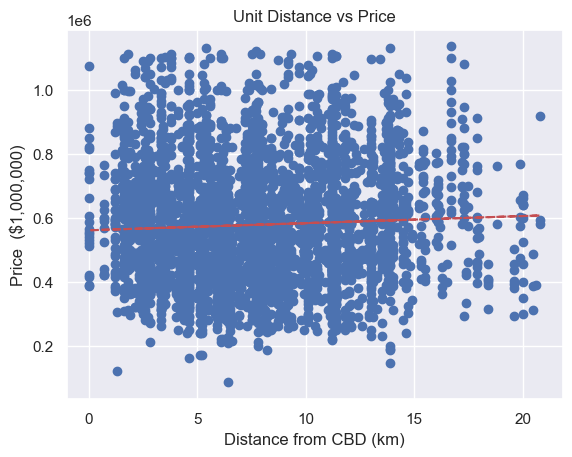

In [14]:
# (u)nit Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (u)nit distance and (u)nit price 
ud_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<ud_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)&(mel_sales_df["Price"]>up_lower_bound)]

ud_distance = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="u"),"Distance"] 
ud_price = ud_mel_sales_df.loc[(ud_mel_sales_df["Type"]=="u"),"Price"]
#groups = mel_sales_df.groupby("Type") 

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(ud__slope, ud__int, ud__rvalue, ud__pvalue, ud__stderr) = stats.linregress(ud_distance, ud_price)
ud__fit = ud_distance * ud__slope +ud__int
ud_line_eq = "y = " + str(round(ud__slope)) + "x + " + str(round(ud__int))


plt.scatter(ud_distance,ud_price)
plt.plot(ud_distance,ud__fit,"r--")

plt.title('Unit Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
ud__rsquare= round((ud__rvalue**2),4)

plt.annotate(ud_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ud__rsquare}")
print(f"{ud_line_eq}")
plt.show()


In [15]:
#-------------------------Landsize Scatter & Regression

The r-squared value is:0.0085
y = 200x + 1045411


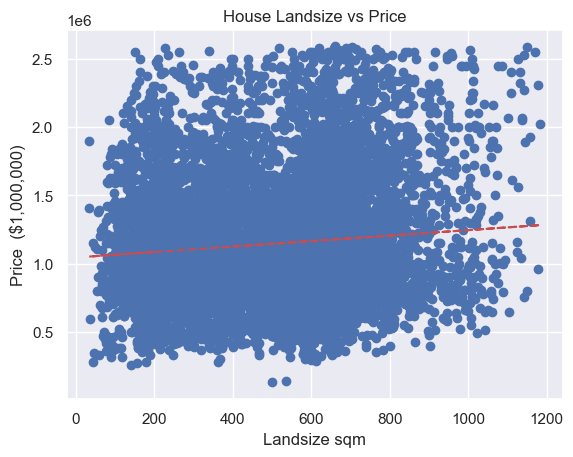

In [16]:
# (h)ouse Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
hl_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<hl_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)]

hl_Landsize = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h"),"Landsize"] 
hl_price = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(hl_slope, hl_int, hl_rvalue, hl_pvalue, hl_stderr) = stats.linregress(hl_Landsize, hl_price)
hl_fit = hl_Landsize * hl_slope +hl_int
hl_line_eq = "y = " + str(round(hl_slope)) + "x + " + str(round(hl_int))


plt.scatter(hl_Landsize,hl_price)
plt.plot(hl_Landsize,hl_fit,"r--")

plt.title('House Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
hl_rsquare= round((hl_rvalue**2),4)

plt.annotate(hl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hl_rsquare}")
print(f"{hl_line_eq}")
plt.show()



The r-squared value is:0.0141
y = -53x + 655789


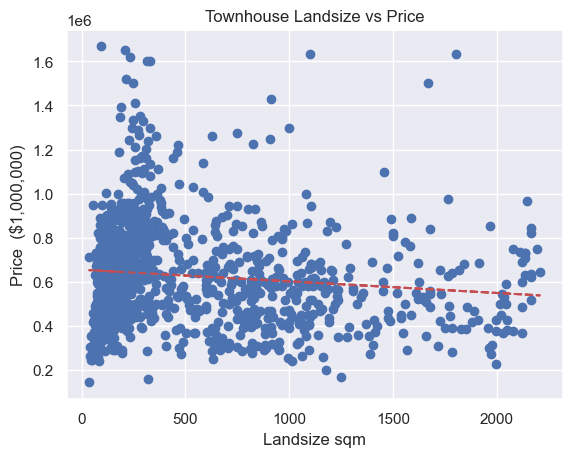

In [17]:
# (t)ownhouse Landsize vs Price: tl..df
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (t)ownhouse Landsize and (t)ownhouse price 
tl_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<tl_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]

tl_Landsize = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="u"),"Landsize"] 
tl_price = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="u"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calctlate predicted number
(tl_slope, tl_int, tl_rvalue, tl_pvalue, tl_stderr) = stats.linregress(tl_Landsize, tl_price)
tl_fit = tl_Landsize * tl_slope +tl_int
tl_line_eq = "y = " + str(round(tl_slope)) + "x + " + str(round(tl_int))


plt.scatter(tl_Landsize,tl_price)
plt.plot(tl_Landsize,tl_fit,"r--")

plt.title('Townhouse Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
tl_rsquare= round((tl_rvalue**2),4)

plt.annotate(tl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{tl_rsquare}")
print(f"{tl_line_eq}")
plt.show()




The r-squared value is:0.0212
y = -52x + 631617


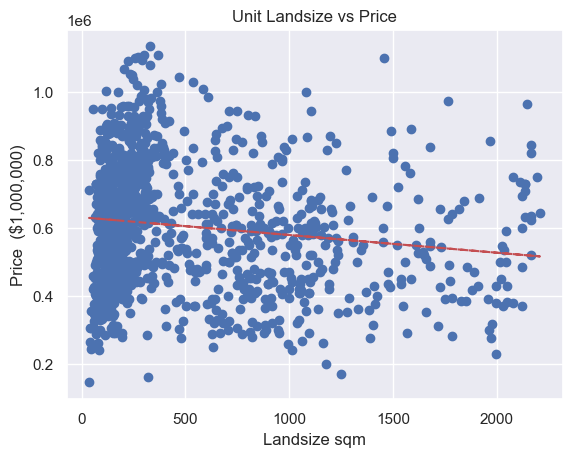

In [18]:
# (u)nit Landsize vs Price: ul..df
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (u)nit Landsize and (u)nit price 
ul_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<ul_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)&(mel_sales_df["Price"]>up_lower_bound)]

ul_Landsize = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u"),"Landsize"] 
ul_price = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(ul_slope, ul_int, ul_rvalue, ul_pvalue, ul_stderr) = stats.linregress(ul_Landsize, ul_price)
ul_fit = ul_Landsize * ul_slope +ul_int
ul_line_eq = "y = " + str(round(ul_slope)) + "x + " + str(round(ul_int))


plt.scatter(ul_Landsize,ul_price)
plt.plot(ul_Landsize,ul_fit,"r--")

plt.title('Unit Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
ul_rsquare= round((ul_rvalue**2),4)

plt.annotate(ul_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ul_rsquare}")
print(f"{ul_line_eq}")
plt.show()



In [19]:
#-------------------------Building Area Scatter & Regression

The r-squared value is:0.0211
y = 620x + 701649


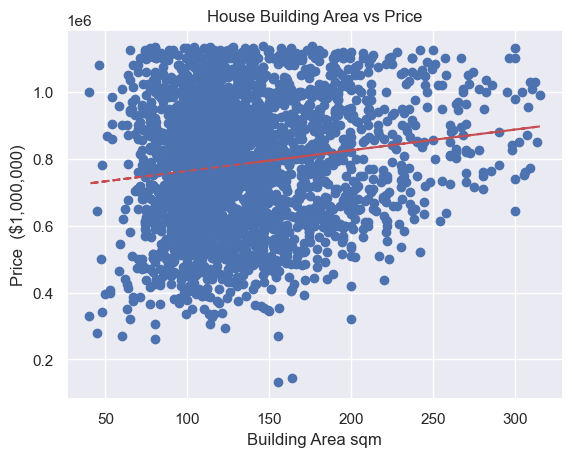

In [20]:
# (t)house BuildingArea vs Price: ha..df
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ha_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ha_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)&(mel_sales_df["Price"]>up_lower_bound)]

ha_BuildingArea = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h"),"BuildingArea"] 
ha_price = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ha_slope, ha_int, ha_rvalue, ha_pvalue, ha_stderr) = stats.linregress(ha_BuildingArea, ha_price)
ha_fit = ha_BuildingArea * ha_slope +ha_int
ha_line_eq = "y = " + str(round(ha_slope)) + "x + " + str(round(ha_int))


plt.scatter(ha_BuildingArea,ha_price)
plt.plot(ha_BuildingArea,ha_fit,"r--")

plt.title('House Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ha_rsquare= round((ha_rvalue**2),4)

plt.annotate(ha_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ha_rsquare}")
print(f"{ha_line_eq}")
plt.show()




The r-squared value is:0.2517
y = 2965x + 375411


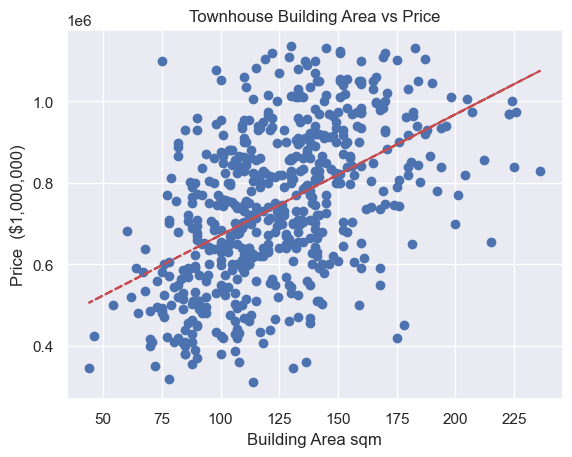

In [21]:
# (t)ownhouse BuildingArea vs Price: ta..df
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (t)ownhouse BuildingArea and (t)ownhouse price 
ta_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ta_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)&(mel_sales_df["Price"]>up_lower_bound)]

ta_BuildingArea = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t"),"BuildingArea"] 
ta_price = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ta_slope, ta_int, ta_rvalue, ta_pvalue, ta_stderr) = stats.linregress(ta_BuildingArea, ta_price)
ta_fit = ta_BuildingArea * ta_slope +ta_int
ta_line_eq = "y = " + str(round(ta_slope)) + "x + " + str(round(ta_int))


plt.scatter(ta_BuildingArea,ta_price)
plt.plot(ta_BuildingArea,ta_fit,"r--")

plt.title('Townhouse Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ta_rsquare= round((ta_rvalue**2),4)

plt.annotate(ta_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ta_rsquare}")
print(f"{ta_line_eq}")
plt.show()


The r-squared value is:0.4296
y = 5129x + 167527


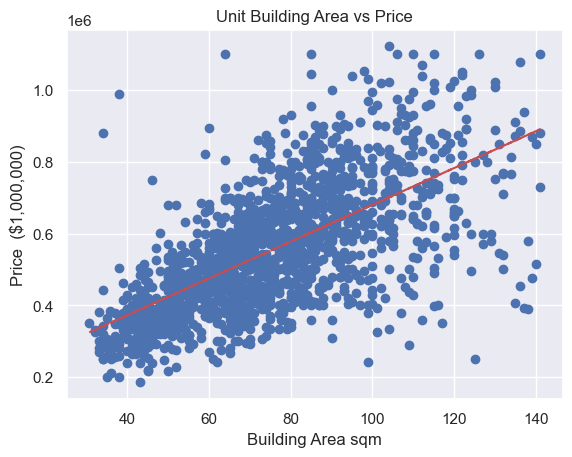

In [22]:
# (u)nit BuildingArea vs Price: ua..df
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (u)nit BuildingArea and (u)nit  price 
ua_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ua_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)&(mel_sales_df["Price"]>up_lower_bound)]

ua_BuildingArea = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u"),"BuildingArea"] 
ua_price = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u"),"Price"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ua_slope, ua_int, ua_rvalue, ua_pvalue, ua_stderr) = stats.linregress(ua_BuildingArea, ua_price)
ua_fit = ua_BuildingArea * ua_slope +ua_int
ua_line_eq = "y = " + str(round(ua_slope)) + "x + " + str(round(ua_int))


plt.scatter(ua_BuildingArea,ua_price)
plt.plot(ua_BuildingArea,ua_fit,"r--")
plt.title('Unit Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ua_rsquare= round((ua_rvalue**2),4)

plt.annotate(ua_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ua_rsquare}")
print(f"{ua_line_eq}")
plt.show()




In [23]:
#----------------Color Charts
#------------------- Distance

The r-squared value is:0.1134
y = -34822x + 1521090


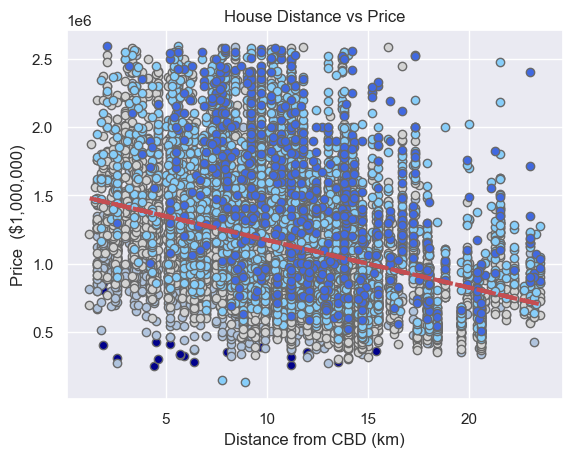

In [24]:
# (h)ouse Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
hd_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<hd_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)]
hd_distance = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h"),"Distance"] 
hd_price = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h"),"Price"]

#-- colour data series by room number

hd_distance_1 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==1),"Distance"] 
hd_price_1 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==1),"Price"]

hd_distance_2 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==2),"Distance"] 
hd_price_2 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==2),"Price"]

hd_distance_3 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==3),"Distance"] 
hd_price_3 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==3),"Price"]

hd_distance_4 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==4),"Distance"] 
hd_price_4 = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]==4),"Price"]

hd_distance_5a = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]>=5),"Distance"] 
hd_price_5a = hd_mel_sales_df.loc[(hd_mel_sales_df["Type"]=="h")&(hd_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(hd_slope, hd_int, hd_rvalue, hd_pvalue, hd_stderr) = stats.linregress(hd_distance, hd_price)
hd_fit = hd_distance * hd_slope +hd_int
hd_line_eq = "y = " + str(round(hd_slope)) + "x + " + str(round(hd_int))

#plt.scatter(hd_distance,hd_price, label = hd_colour)

plt.scatter(hd_distance_1,hd_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(hd_distance_2,hd_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(hd_distance_3,hd_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(hd_distance_4,hd_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(hd_distance_5a,hd_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(hd_distance,hd_fit,"r--", linewidth=3)

plt.title('House Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
hd_rsquare= round((hd_rvalue**2),4)


plt.annotate(hd_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hd_rsquare}")
print(f"{hd_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-squared value is:0.0056
y = -5865x + 950883


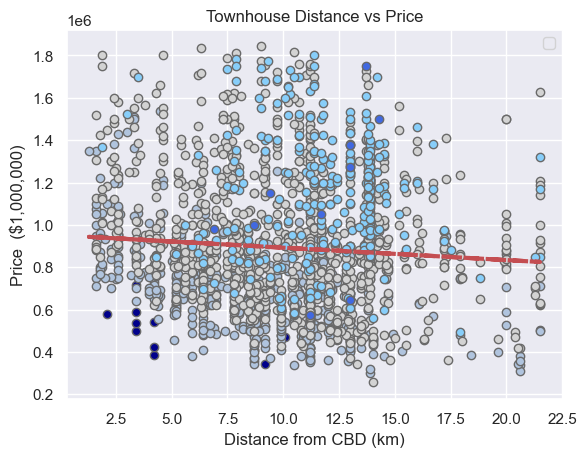

In [25]:
# (t)ownhouse Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
td_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]>=0)&(mel_sales_df["Distance"]<td_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]
td_distance = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t"),"Distance"] 
td_price = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t"),"Price"]

#-- colour data series by room number

td_distance_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==1),"Distance"] 
td_price_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==1),"Price"]

td_distance_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==2),"Distance"] 
td_price_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==2),"Price"]

td_distance_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==3),"Distance"] 
td_price_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==3),"Price"]

td_distance_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==4),"Distance"] 
td_price_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]==4),"Price"]

td_distance_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]>=5),"Distance"] 
td_price_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="t")&(td_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(td_slope, td_int, td_rvalue, td_pvalue, td_stderr) = stats.linregress(td_distance, td_price)
td_fit = td_distance * td_slope +td_int
td_line_eq = "y = " + str(round(td_slope)) + "x + " + str(round(td_int))

#plt.scatter(td_distance,td_price, label = td_colour)

plt.scatter(td_distance_1,td_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(td_distance_2,td_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(td_distance_3,td_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(td_distance_4,td_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(td_distance_5a,td_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(td_distance,td_fit,"r--", linewidth=3)

plt.title('Townhouse Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
plt.legend(loc='upper right')
td_rsquare= round((td_rvalue**2),4)

plt.annotate(td_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{td_rsquare}")
print(f"{td_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()


The r-squared value is:0.0001
y = -629x + 612336


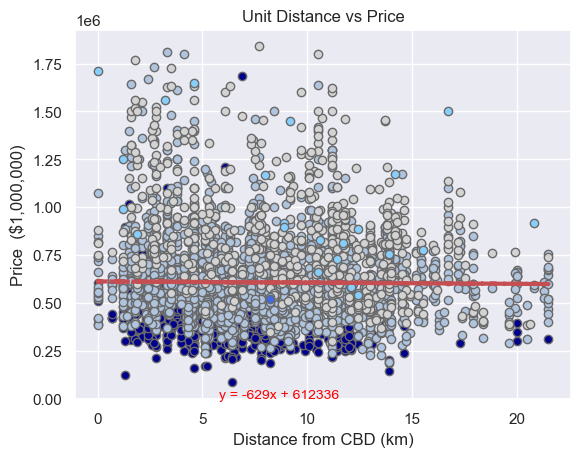

In [26]:
# (u)nit Distance vs Price
# Plot the linear model on top of scatter plot for Distance vs Price
# create df to exclude outliers (h)ouse distance and (h)ouse price 
td_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<td_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]
td_distance = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u"),"Distance"] 
td_price = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u"),"Price"]

#-- colour data series by room number

td_distance_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==1),"Distance"] 
td_price_1 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==1),"Price"]

td_distance_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==2),"Distance"] 
td_price_2 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==2),"Price"]

td_distance_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==3),"Distance"] 
td_price_3 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==3),"Price"]

td_distance_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==4),"Distance"] 
td_price_4 = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]==4),"Price"]

td_distance_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]>=5),"Distance"] 
td_price_5a = td_mel_sales_df.loc[(td_mel_sales_df["Type"]=="u")&(td_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(td_slope, td_int, td_rvalue, td_pvalue, td_stderr) = stats.linregress(td_distance, td_price)
td_fit = td_distance * td_slope +td_int
td_line_eq = "y = " + str(round(td_slope)) + "x + " + str(round(td_int))

#plt.scatter(td_distance,td_price, label = td_colour)

plt.scatter(td_distance_1,td_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(td_distance_2,td_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(td_distance_3,td_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(td_distance_4,td_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(td_distance_5a,td_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(td_distance,td_fit,"r--", linewidth=3)

plt.title('Unit Distance vs Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price  ($1,000,000)')
td_rsquare= round((td_rvalue**2),4)

plt.annotate(td_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{td_rsquare}")
print(f"{td_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()



The r-squared value is:0.0085
y = 200x + 1045411


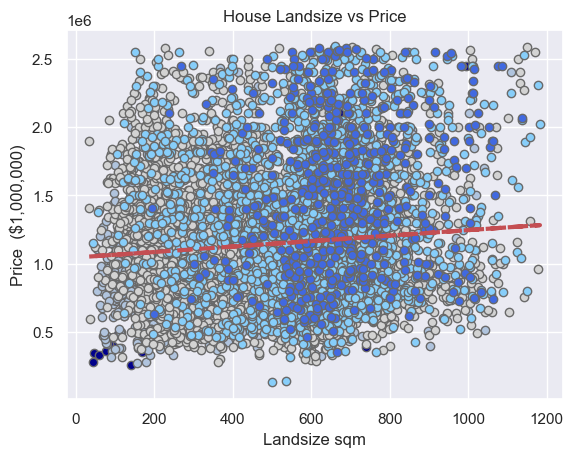

In [27]:
#-------------------------------- Landsize
# (h)ouse Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
hl_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<hl_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)]
hl_Landsize = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h"),"Landsize"] 
hl_price = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h"),"Price"]

#-- colour data series by room number

hl_Landsize_1 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==1),"Landsize"] 
hl_price_1 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==1),"Price"]

hl_Landsize_2 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==2),"Landsize"] 
hl_price_2 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==2),"Price"]

hl_Landsize_3 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==3),"Landsize"] 
hl_price_3 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==3),"Price"]

hl_Landsize_4 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==4),"Landsize"] 
hl_price_4 = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]==4),"Price"]

hl_Landsize_5a = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]>=5),"Landsize"] 
hl_price_5a = hl_mel_sales_df.loc[(hl_mel_sales_df["Type"]=="h")&(hl_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(hl_slope, hl_int, hl_rvalue, hl_pvalue, hl_stderr) = stats.linregress(hl_Landsize, hl_price)
hl_fit = hl_Landsize * hl_slope +hl_int
hl_line_eq = "y = " + str(round(hl_slope)) + "x + " + str(round(hl_int))

#plt.scatter(hl_Landsize,hl_price, label = hl_colour)

plt.scatter(hl_Landsize_1,hl_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(hl_Landsize_2,hl_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(hl_Landsize_3,hl_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(hl_Landsize_4,hl_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(hl_Landsize_5a,hl_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(hl_Landsize,hl_fit,"r--", linewidth=3)

plt.title('House Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
hl_rsquare= round((hl_rvalue**2),4)

plt.annotate(hl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{hl_rsquare}")
print(f"{hl_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()




The r-squared value is:0.0581
y = 350x + 807535


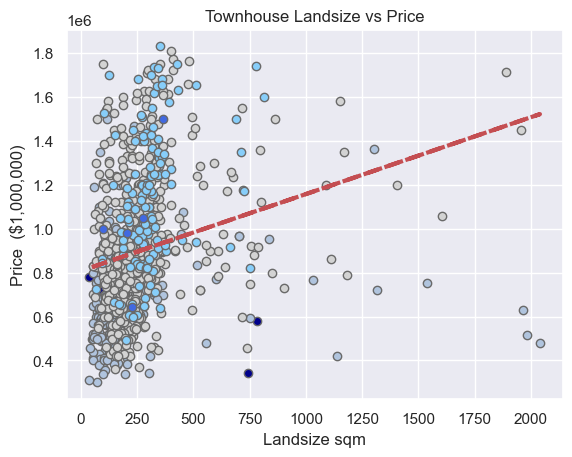

In [28]:
#-------------------------------- Landsize
# (t)ownhouse Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
tl_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<tl_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]
tl_Landsize = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t"),"Landsize"] 
tl_price = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t"),"Price"]

#-- colour data series by room number

tl_Landsize_1 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==1),"Landsize"] 
tl_price_1 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==1),"Price"]

tl_Landsize_2 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==2),"Landsize"] 
tl_price_2 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==2),"Price"]

tl_Landsize_3 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==3),"Landsize"] 
tl_price_3 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==3),"Price"]

tl_Landsize_4 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==4),"Landsize"] 
tl_price_4 = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]==4),"Price"]

tl_Landsize_5a = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]>=5),"Landsize"] 
tl_price_5a = tl_mel_sales_df.loc[(tl_mel_sales_df["Type"]=="t")&(tl_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(tl_slope, tl_int, tl_rvalue, tl_pvalue, tl_stderr) = stats.linregress(tl_Landsize, tl_price)
tl_fit = tl_Landsize * tl_slope +tl_int
tl_line_eq = "y = " + str(round(tl_slope)) + "x + " + str(round(tl_int))

#plt.scatter(tl_Landsize,tl_price, label = tl_colour)

plt.scatter(tl_Landsize_1,tl_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(tl_Landsize_2,tl_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(tl_Landsize_3,tl_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(tl_Landsize_4,tl_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(tl_Landsize_5a,tl_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(tl_Landsize,tl_fit,"r--", linewidth=3)

plt.title('Townhouse Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
tl_rsquare= round((tl_rvalue**2),4)

plt.annotate(tl_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{tl_rsquare}")
print(f"{tl_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()




The r-squared value is:0.0212
y = -52x + 631617


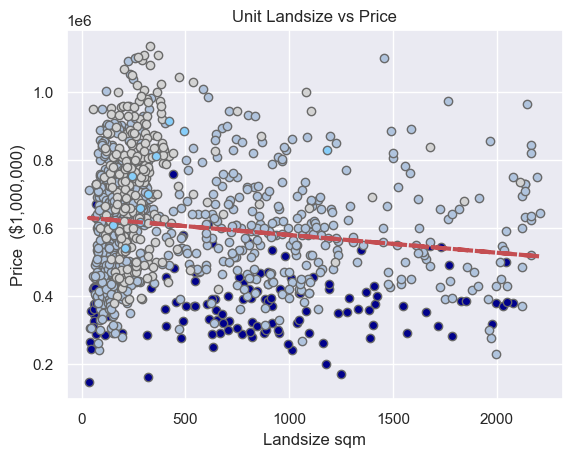

In [29]:
#-------------------------------- Landsize
# (u)nit Landsize vs Price
# Plot the linear model on top of scatter plot for Landsize vs Price
# create df to exclude outliers (h)ouse Landsize and (h)ouse price 
ul_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Landsize"]>30)&(mel_sales_df["Landsize"]<ul_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)]
ul_Landsize = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u"),"Landsize"] 
ul_price = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u"),"Price"]

#-- colour data series by room number

ul_Landsize_1 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==1),"Landsize"] 
ul_price_1 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==1),"Price"]

ul_Landsize_2 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==2),"Landsize"] 
ul_price_2 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==2),"Price"]

ul_Landsize_3 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==3),"Landsize"] 
ul_price_3 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==3),"Price"]

ul_Landsize_4 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==4),"Landsize"] 
ul_price_4 = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]==4),"Price"]

ul_Landsize_5a = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]>=5),"Landsize"] 
ul_price_5a = ul_mel_sales_df.loc[(ul_mel_sales_df["Type"]=="u")&(ul_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Landsize vs Price
# Create equation of line to calculate predicted number
(ul_slope, ul_int, ul_rvalue, ul_pvalue, ul_stderr) = stats.linregress(ul_Landsize, ul_price)
ul_fit = ul_Landsize * ul_slope +ul_int
ul_line_eq = "y = " + str(round(ul_slope)) + "x + " + str(round(ul_int))

#plt.scatter(ul_Landsize,ul_price, label = ul_colour)

plt.scatter(ul_Landsize_1,ul_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(ul_Landsize_2,ul_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(ul_Landsize_3,ul_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(ul_Landsize_4,ul_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(ul_Landsize_5a,ul_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(ul_Landsize,ul_fit,"r--", linewidth=3)

plt.title('Unit Landsize vs Price')
plt.xlabel('Landsize sqm')
plt.ylabel('Price  ($1,000,000)')
ul_rsquare= round((ul_rvalue**2),4)

plt.annotate(ul_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ul_rsquare}")
print(f"{ul_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()





The r-squared value is:0.1826
y = 3810x + 550647


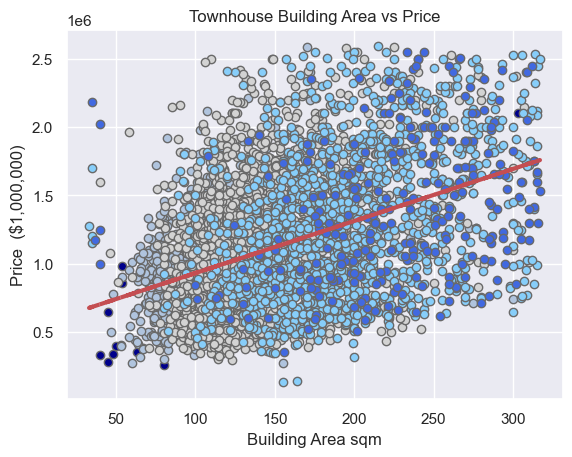

In [30]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ha_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ha_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)]
ha_BuildingArea = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h"),"BuildingArea"] 
ha_price = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h"),"Price"]

#-- colour data series by room number

ha_BuildingArea_1 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ha_price_1 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==1),"Price"]

ha_BuildingArea_2 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ha_price_2 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==2),"Price"]

ha_BuildingArea_3 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ha_price_3 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==3),"Price"]

ha_BuildingArea_4 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ha_price_4 = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]==4),"Price"]

ha_BuildingArea_5a = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ha_price_5a = ha_mel_sales_df.loc[(ha_mel_sales_df["Type"]=="h")&(ha_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ha_slope, ha_int, ha_rvalue, ha_pvalue, ha_stderr) = stats.linregress(ha_BuildingArea, ha_price)
ha_fit = ha_BuildingArea * ha_slope +ha_int
ha_line_eq = "y = " + str(round(ha_slope)) + "x + " + str(round(ha_int))

#plt.scatter(ha_BuildingArea,ha_price, label = ha_colour)

plt.scatter(ha_BuildingArea_1,ha_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(ha_BuildingArea_2,ha_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(ha_BuildingArea_3,ha_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(ha_BuildingArea_4,ha_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(ha_BuildingArea_5a,ha_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(ha_BuildingArea,ha_fit,"r--", linewidth=3)

plt.title('Townhouse Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ha_rsquare= round((ha_rvalue**2),4)

plt.annotate(ha_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ha_rsquare}")
print(f"{ha_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()






The r-squared value is:0.3667
y = 4803x + 211309


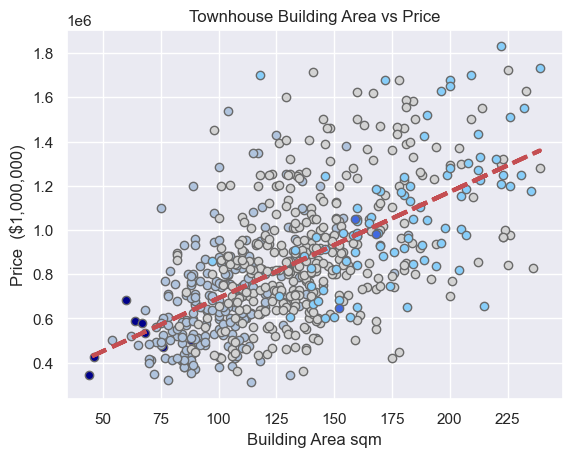

In [31]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ta_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ta_upper_bound)&(mel_sales_df["Price"]<tp_upper_bound)]
ta_BuildingArea = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t"),"BuildingArea"] 
ta_price = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t"),"Price"]

#-- colour data series by room number

ta_BuildingArea_1 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ta_price_1 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==1),"Price"]

ta_BuildingArea_2 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ta_price_2 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==2),"Price"]

ta_BuildingArea_3 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ta_price_3 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==3),"Price"]

ta_BuildingArea_4 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ta_price_4 = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]==4),"Price"]

ta_BuildingArea_5a = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ta_price_5a = ta_mel_sales_df.loc[(ta_mel_sales_df["Type"]=="t")&(ta_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ta_slope, ta_int, ta_rvalue, ta_pvalue, ta_stderr) = stats.linregress(ta_BuildingArea, ta_price)
ta_fit = ta_BuildingArea * ta_slope +ta_int
ta_line_eq = "y = " + str(round(ta_slope)) + "x + " + str(round(ta_int))

#plt.scatter(ta_BuildingArea,ta_price, label = ta_colour)

plt.scatter(ta_BuildingArea_1,ta_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(ta_BuildingArea_2,ta_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(ta_BuildingArea_3,ta_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(ta_BuildingArea_4,ta_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(ta_BuildingArea_5a,ta_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(ta_BuildingArea,ta_fit,"r--", linewidth=3)

plt.title('Townhouse Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ta_rsquare= round((ta_rvalue**2),4)

plt.annotate(ta_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ta_rsquare}")
print(f"{ta_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()





The r-squared value is:0.4296
y = 5129x + 167527


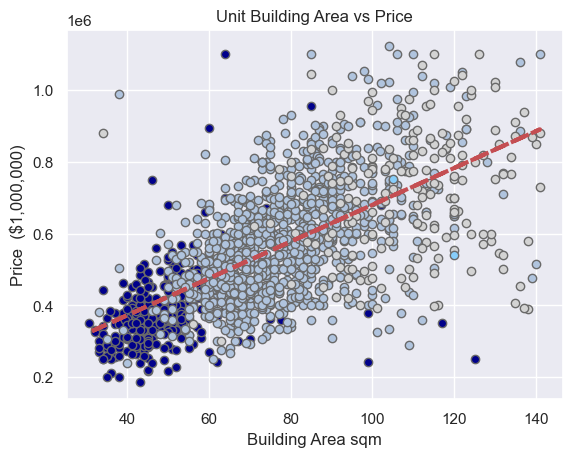

In [32]:
#-------------------------------- BuildingArea
# (t)ownouse BuildingArea vs Price
# Plot the linear model on top of scatter plot for BuildingArea vs Price
# create df to exclude outliers (h)ouse BuildingArea and (h)ouse price 
ua_mel_sales_df = mel_sales_df.loc[(mel_sales_df["BuildingArea"]>30)&(mel_sales_df["BuildingArea"]<ua_upper_bound)&(mel_sales_df["Price"]<up_upper_bound)]
ua_BuildingArea = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u"),"BuildingArea"] 
ua_price = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u"),"Price"]

#-- colour data series by room number

ua_BuildingArea_1 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==1),"BuildingArea"] 
ua_price_1 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==1),"Price"]

ua_BuildingArea_2 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==2),"BuildingArea"] 
ua_price_2 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==2),"Price"]

ua_BuildingArea_3 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==3),"BuildingArea"] 
ua_price_3 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==3),"Price"]

ua_BuildingArea_4 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==4),"BuildingArea"] 
ua_price_4 = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]==4),"Price"]

ua_BuildingArea_5a = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]>=5),"BuildingArea"] 
ua_price_5a = ua_mel_sales_df.loc[(ua_mel_sales_df["Type"]=="u")&(ua_mel_sales_df["Rooms"]>=5),"Price"]

#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on BuildingArea vs Price
# Create equation of line to calculate predicted number
(ua_slope, ua_int, ua_rvalue, ua_pvalue, ua_stderr) = stats.linregress(ua_BuildingArea, ua_price)
ua_fit = ua_BuildingArea * ua_slope +ua_int
ua_line_eq = "y = " + str(round(ua_slope)) + "x + " + str(round(ua_int))

#plt.scatter(ua_BuildingArea,ua_price, label = ua_colour)

plt.scatter(ua_BuildingArea_1,ua_price_1, color = 'darkblue',edgecolor='dimgrey')
plt.scatter(ua_BuildingArea_2,ua_price_2, color = 'lightsteelblue' ,edgecolor='dimgrey')
plt.scatter(ua_BuildingArea_3,ua_price_3, color = 'lightgrey' ,edgecolor='dimgrey')
plt.scatter(ua_BuildingArea_4,ua_price_4, color = 'lightskyblue' ,edgecolor='dimgrey')
plt.scatter(ua_BuildingArea_5a,ua_price_5a, color = 'royalblue' ,edgecolor='dimgrey')
plt.plot(ua_BuildingArea,ua_fit,"r--", linewidth=3)

plt.title('Unit Building Area vs Price')
plt.xlabel('Building Area sqm')
plt.ylabel('Price  ($1,000,000)')
ua_rsquare= round((ua_rvalue**2),4)

plt.annotate(ua_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{ua_rsquare}")
print(f"{ua_line_eq}")
plt.show()

#Save the figure 
#plt.tight_layot()
#plt.savefig()
#plt.show()







In [ ]:
#Micah Code END
#-------------------------------------------------------------

C:\Users\Micah\AppData\Local\Temp\ipykernel_3868\1221055876.py:3: RuntimeWarning: divide by zero encountered in divide
  Per_Landsize = np.divide(mel_sales_df["Price"].values,mel_sales_df["Landsize"].values)
C:\Users\Micah\AppData\Local\Temp\ipykernel_3868\1221055876.py:7: RuntimeWarning: divide by zero encountered in divide
  Per_BuildArea = np.divide(mel_sales_df["Price"].values,mel_sales_df["BuildingArea"].values)


The r-squared value is:0.0272
y = -245x + 5838


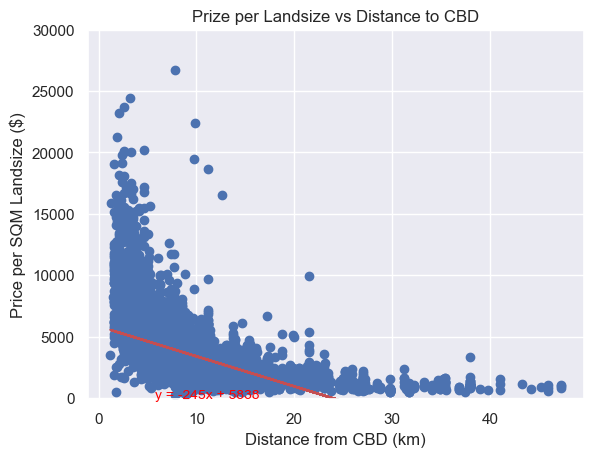

The r-squared value is:0.0051
y = -323x + 13372


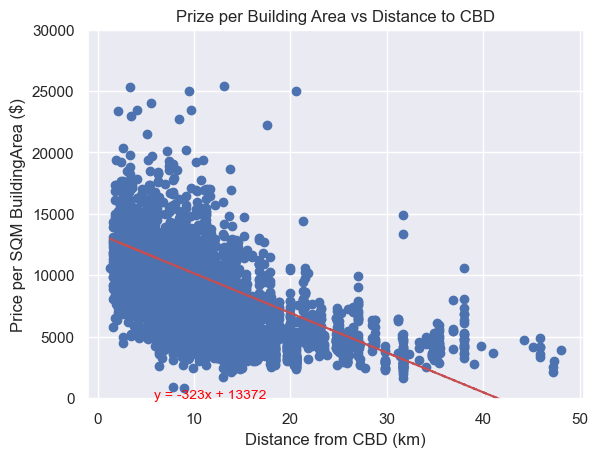

In [33]:
#----------------------------------------------------------------------------------------
#Price per Square Metre
Per_Landsize = np.divide(mel_sales_df["Price"].values,mel_sales_df["Landsize"].values)
mel_sales_df["Per_Landsize"] = Per_Landsize


Per_BuildArea = np.divide(mel_sales_df["Price"].values,mel_sales_df["BuildingArea"].values)
mel_sales_df["Per_BuildArea"] = Per_BuildArea

mel_sales_df.head()


#--------------------Compare per Per_Landsize / exclude 0  // compare by distance (h)ouse only

# Plot the linear model on top of scatter plot for Distance vs Per_Landsize
# create df to exclude outliers (h)ouse distance and (h)ouse price ]
pls_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<hp_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)&(mel_sales_df["Per_Landsize"]>0)&(mel_sales_df["Landsize"]>0)&(mel_sales_df["Landsize"]<hl_upper_bound)]

pls_distance = pls_mel_sales_df.loc[(pls_mel_sales_df["Type"]=="h"),"Distance"] 
h_Per_Landsize = pls_mel_sales_df.loc[(pls_mel_sales_df["Type"]=="h"),"Per_Landsize"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(pls_slope, pls_int, pls_rvalue, pls_pvalue, pls_stderr) = stats.linregress(pls_distance, h_Per_Landsize)
pls_fit = pls_distance * pls_slope +pls_int
pls_line_eq = "y = " + str(round(pls_slope)) + "x + " + str(round(pls_int))


plt.scatter(pls_distance,h_Per_Landsize)
plt.plot(pls_distance,pls_fit,"r--")

plt.title('Prize per Landsize vs Distance to CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price per SQM Landsize ($)')
plt.ylim(-100,30000)
pls_rsquare= round((pls_rvalue**2),4)

plt.annotate(pls_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{pls_rsquare}")
print(f"{pls_line_eq}")
plt.show()


#--------------------Compare per Per_BuildArea / exclude 0  // compare by distance (h)ouse only

# Plot the linear model on top of scatter plot for Distance vs Per_BuildArea
# create df to exclude outliers (h)ouse distance and (h)ouse price 
pba_mel_sales_df = mel_sales_df.loc[(mel_sales_df["Distance"]<hp_upper_bound)&(mel_sales_df["Price"]<hp_upper_bound)&(mel_sales_df["Per_BuildArea"]>0)&(mel_sales_df["BuildingArea"]>0)&(mel_sales_df["BuildingArea"]<ha_upper_bound)]

pba_distance = pba_mel_sales_df.loc[(pba_mel_sales_df["Type"]=="h"),"Distance"] 
h_Per_BuildArea = pba_mel_sales_df.loc[(pba_mel_sales_df["Type"]=="h"),"Per_BuildArea"]
#groups = mel_sales_df.groupby("Type")

# Perform a linear regression on Distance vs Price
# Create equation of line to calculate predicted number
(pba_slope, pba_int, pba_rvalue, pba_pvalue, pba_stderr) = stats.linregress(pba_distance, h_Per_BuildArea)
pba_fit = pba_distance * pba_slope +pba_int
pba_line_eq = "y = " + str(round(pba_slope)) + "x + " + str(round(pba_int))

plt.scatter(pba_distance,h_Per_BuildArea)
plt.plot(pba_distance,pba_fit,"r--")

plt.title('Prize per Building Area vs Distance to CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price per SQM BuildingArea ($)')
plt.ylim(-100,30000)
pba_rsquare= round((pba_rvalue**2),4)

plt.annotate(pba_line_eq,(5.8,0.8),fontsize=10,color="red")
print(f"The r-squared value is:{pba_rsquare}")
print(f"{pba_line_eq}")
plt.show()



